## Description du jeu de données

1) Origine des données

https://www.kaggle.com/datasets/guillemservera/commodities-futures-collection

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [15]:
df = pd.read_csv('all_commodities_futures_collection.csv')

2. signification de chaque variable

| **Colonne** | **Description** |
|-------------|-----------------|
| **date**    | La date associée à l'enregistrement des marchandises. |
| **commodity** | Le nom de la marchandise (ex. : pétrole, or, blé) associée à cet enregistrement. |
| **ticker**  | Le symbole ou identifiant unique utilisé pour représenter la marchandise sur les marchés financiers. |
| **category** | La classification de la marchandise (par exemple : énergie, métaux précieux, agriculture). |
| **open**    | Le prix d'ouverture de la marchandise pour la période indiquée dans la colonne date. |
| **high**    | Le prix le plus élevé atteint par la marchandise pendant la période indiquée. |
| **low**     | Le prix le plus bas atteint par la marchandise pendant la période indiquée. |
| **close**   | Le prix de clôture de la marchandise pour la période indiquée. |
| **volume**  | Le volume total échangé pour la marchandise pendant la période indiquée. |


3. Nombre d’observations, nombre de variables

In [16]:
df.shape
# (135295, 9)

(135295, 9)

In [17]:
obs_count = df.shape[0]
var_count = df.shape[1]
print(f"Il y a {obs_count} observations et {var_count} variables.")

Il y a 135295 observations et 9 variables.


4. Types de variables

In [18]:
df.dtypes

ticker        object
commodity     object
category      object
date          object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

*Pour optimiser, changeons les types de variables:*

In [19]:
df[['ticker', 'commodity', 'category']] = df[['ticker', 'commodity', 'category']].astype('category')
df['date'] = pd.to_datetime(df['date'])
df.dtypes

ticker             category
commodity          category
category           category
date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: object

5. Nombre de valeurs manquantes par variable

In [20]:
null_values = df.isnull().sum()
null_values

ticker       0
commodity    0
category     0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Pas de valeurs manquantes à première vue. Il faut vérifier que toutes les matières premières sont dans la même plage temporelle. Tout d'abord, examinons la quantité de valeurs pour chaque matière première:

In [21]:
df[['commodity', 'ticker']].value_counts()

commodity             ticker
Cocoa                 CC=F      6137
Cotton                CT=F      6136
Coffee                KC=F      6134
Rough Rice            ZR=F      6130
Sugar                 SB=F      6097
Soybean Oil           ZL=F      6003
Corn                  ZC=F      5987
Crude Oil             CL=F      5984
Natural Gas           NG=F      5980
Soybean               ZS=F      5979
Copper                HG=F      5979
Heating Oil           HO=F      5977
KC HRW Wheat          KE=F      5976
Silver                SI=F      5976
Gold                  GC=F      5975
Oat                   ZO=F      5966
RBOB Gasoline         RB=F      5938
Random Length Lumber  LBS=F     5723
Palladium             PA=F      5683
Lean Hogs             HE=F      5603
Live Cattle           LE=F      5589
Platinum              PL=F      5443
Brent Crude Oil       BZ=F      4196
Orange Juice          OJ=F       704
Name: count, dtype: int64

Le nombre de valeurs n'est pas le même pour chaque marchandise. It faut vérifier si'il y a des doublons.

In [22]:
duplicates = df[df.duplicated(subset = ['date', 'commodity', 'category', 'ticker'])]
dup_count_by_category = duplicates['commodity'].value_counts()
dup_count_by_category

commodity
Brent Crude Oil         0
Cocoa                   0
Soybean Oil             0
Soybean                 0
Silver                  0
Rough Rice              0
Random Length Lumber    0
RBOB Gasoline           0
Platinum                0
Palladium               0
Orange Juice            0
Oat                     0
Natural Gas             0
Live Cattle             0
Lean Hogs               0
KC HRW Wheat            0
Heating Oil             0
Gold                    0
Crude Oil               0
Cotton                  0
Corn                    0
Copper                  0
Coffee                  0
Sugar                   0
Name: count, dtype: int64

Lorsque le nombre de valeurs n'est pas le même pour chaque marchandise et il n'y a pas de doublons, c'est très probable que toutes les marchandises ne sont pas dans la même plage de dates. Cela sera impossible de les agréger et de les comparer. Identifions les dates pour lesquelles il y a des valeurs manquantes pour chaque marchandise.
Créons un pivot table pour faciliter l'analyse.

In [23]:
pivot_table_close = df.pivot_table(index='date', columns='commodity', values='close', observed=False)
pivot_table_close.head()

commodity,Brent Crude Oil,Cocoa,Coffee,Copper,Corn,Cotton,Crude Oil,Gold,Heating Oil,KC HRW Wheat,...,Orange Juice,Palladium,Platinum,RBOB Gasoline,Random Length Lumber,Rough Rice,Silver,Soybean,Soybean Oil,Sugar
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,830.0,116.500000,NaN,NaN,51.070000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,636.650024,NaN,NaN,NaN,NaN
2000-01-04,NaN,836.0,116.250000,NaN,NaN,50.730000,NaN,NaN,NaN,NaN,...,NaN,441.899994,429.700012,NaN,NaN,629.450012,NaN,NaN,NaN,NaN
2000-01-05,NaN,831.0,118.599998,NaN,NaN,51.560001,NaN,NaN,NaN,NaN,...,NaN,438.100006,419.899994,NaN,NaN,626.500000,NaN,NaN,NaN,NaN
2000-01-06,NaN,841.0,116.849998,NaN,NaN,52.080002,NaN,NaN,NaN,NaN,...,NaN,435.299988,412.000000,NaN,NaN,627.299988,NaN,NaN,NaN,NaN
2000-01-07,NaN,853.0,114.150002,NaN,NaN,53.959999,NaN,NaN,NaN,NaN,...,NaN,443.899994,414.000000,NaN,NaN,624.349976,NaN,NaN,NaN,NaN


In [24]:
# nombre de valeurs manquantes
ptc_na = pivot_table_close.isnull().sum()
ptc_na

commodity
Brent Crude Oil         1977
Cocoa                     36
Coffee                    39
Copper                   194
Corn                     186
Cotton                    37
Crude Oil                189
Gold                     198
Heating Oil              196
KC HRW Wheat             197
Lean Hogs                570
Live Cattle              584
Natural Gas              193
Oat                      207
Orange Juice            5469
Palladium                490
Platinum                 730
RBOB Gasoline            235
Random Length Lumber     450
Rough Rice                43
Silver                   197
Soybean                  194
Soybean Oil              170
Sugar                     76
dtype: int64

In [25]:
# trouvons le premier valeur qui n'est pas NA dans chaque colonne
first_valid_indices_1 = pivot_table_close.apply(lambda x: x.first_valid_index())
first_valid_indices_1

commodity
Brent Crude Oil        2007-07-30
Cocoa                  2000-01-03
Coffee                 2000-01-03
Copper                 2000-08-30
Corn                   2000-07-17
Cotton                 2000-01-03
Crude Oil              2000-08-23
Gold                   2000-08-30
Heating Oil            2000-09-01
KC HRW Wheat           2000-09-21
Lean Hogs              2002-03-04
Live Cattle            2002-03-04
Natural Gas            2000-08-30
Oat                    2000-01-03
Orange Juice           2021-09-07
Palladium              2000-01-04
Platinum               2000-01-04
RBOB Gasoline          2000-11-01
Random Length Lumber   2000-07-17
Rough Rice             2000-01-03
Silver                 2000-08-30
Soybean                2000-09-15
Soybean Oil            2000-03-15
Sugar                  2000-03-01
dtype: datetime64[ns]

On a verifié que dans la source (Yahoo Finance) les données pour la plupart de matières prémières commeçent par les mêmes dates que dans notre dataframe (sauf Orange Juice, Lean Hogs, Live Cattle). Nous allons ajouter les valeurs manquantes pour la marchandises 'Orange Juice', 'Lean Hogs', 'Live Cattle' que nous avons tirées directement de la source (Yahoo Finance)

In [26]:
df_add = pd.read_csv('additional.csv')
df_add.shape


(5629, 9)

In [27]:
df_add.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
volume        object
ticker        object
commodity     object
category      object
dtype: object

In [28]:
df_add[['ticker', 'commodity', 'category']] = df_add[['ticker', 'commodity', 'category']].astype('category')
df_add['date'] = pd.to_datetime(df_add['date'])
df_add['volume'] = df_add['volume'].astype(str)
df_add['volume'] = df_add['volume'].str.replace(r'[\s,]', '', regex=True).astype('float64')
df_add.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
ticker             category
commodity          category
category           category
dtype: object

Fusion du dataframe initial avec un nouveau dataframe

In [29]:
df = pd.concat([df,df_add], axis = 0, ignore_index = True)
df.shape


(140924, 9)

Lorsque, pour notre analyse, il est important que toutes les données soient dans la même plage de dates, nous avons décidé de n’utiliser que les données depuis le 1er novembre 2000 et de ne pas utiliser Brent Crude Oil, car nous avons également Crude Oil, qui convient très bien à l’analyse. Éliminons donc les données relatives à Brent Crude Oil.

In [30]:
df = df[df['commodity'] != 'Brent Crude Oil']
df.shape


(136728, 9)

Eliminons les données avant 2000-11-01

In [31]:
df = df[df['date'] >= '2000-11-01']
df.shape
(134441, 9)

(134441, 9)

Verifions qu'est ce qu'il y a changé dans notre dataframe par la création de pivot table:

In [32]:
pivot_table_close_01112000 = df.pivot_table(index='date', columns='commodity', values='close', observed = False)
pivot_table_close_01112000.head()

commodity,Cocoa,Coffee,Copper,Corn,Cotton,Crude Oil,Gold,Heating Oil,KC HRW Wheat,Lean Hogs,...,Orange Juice,Palladium,Platinum,RBOB Gasoline,Random Length Lumber,Rough Rice,Silver,Soybean,Soybean Oil,Sugar
date,,,,,,,,,,,,,,,,,,,,,
2000-11-01,753.0,73.900002,0.8330,NaN,62.570000,33.200001,263.899994,0.9409,305.50,NaN,...,NaN,777.200012,578.400024,0.8840,208.300003,613.0,4.774,462.75,NaN,9.75
2000-11-02,764.0,74.250000,0.8360,202.25,62.910000,32.540001,264.399994,0.9318,312.50,NaN,...,NaN,794.000000,594.799988,0.8688,204.300003,621.0,4.711,468.25,14.97,9.54
2000-11-03,749.0,73.599998,0.8360,NaN,63.750000,32.599998,264.600006,0.9217,318.75,NaN,...,NaN,790.500000,590.299988,0.8695,208.300003,622.0,4.741,473.50,NaN,9.57
2000-11-06,743.0,74.699997,0.8250,209.50,65.360001,32.860001,264.500000,0.9169,317.25,NaN,...,NaN,777.500000,584.599976,0.8825,207.399994,622.0,4.761,475.00,15.10,9.56
2000-11-07,746.0,74.599998,0.8285,211.25,65.889999,33.400002,264.299988,0.9493,315.50,NaN,...,NaN,780.750000,592.700012,0.8910,214.100006,617.0,4.721,473.50,15.24,9.53


In [33]:
# trouvons le premier valeur qui n'est pas NA dans chaque colonne
first_valid_indices_2 = pivot_table_close_01112000.apply(lambda x: x.first_valid_index())
first_valid_indices_2

commodity
Cocoa                  2000-11-01
Coffee                 2000-11-01
Copper                 2000-11-01
Corn                   2000-11-02
Cotton                 2000-11-01
Crude Oil              2000-11-01
Gold                   2000-11-01
Heating Oil            2000-11-01
KC HRW Wheat           2000-11-01
Lean Hogs              2000-12-15
Live Cattle            2001-03-01
Natural Gas            2000-11-01
Oat                    2000-11-16
Orange Juice           2001-09-17
Palladium              2000-11-01
Platinum               2000-11-01
RBOB Gasoline          2000-11-01
Random Length Lumber   2000-11-01
Rough Rice             2000-11-01
Silver                 2000-11-01
Soybean                2000-11-01
Soybean Oil            2000-11-02
Sugar                  2000-11-01
dtype: datetime64[ns]

Lorsqu'il n'y a pas de données pour Orange Juice jusqu'à 2001-09-17, éliminons les données avant 2001-09-17:

In [34]:
df = df[df['date'] >= '2001-09-17']
df.shape
# (129991, 9)

(130056, 9)

Créons une nouvelle pivot table pour continuer l'analyse:

In [35]:
pivot_table_close_17092001 = df.pivot_table(index='date', columns='commodity', values='close', observed = False)
pivot_table_close_17092001.head()

commodity,Cocoa,Coffee,Copper,Corn,Cotton,Crude Oil,Gold,Heating Oil,KC HRW Wheat,Lean Hogs,...,Orange Juice,Palladium,Platinum,RBOB Gasoline,Random Length Lumber,Rough Rice,Silver,Soybean,Soybean Oil,Sugar
date,,,,,,,,,,,,,,,,,,,,,
2001-09-17,927.0,48.299999,0.6505,NaN,35.580002,28.809999,289.799988,0.8070,286.00,57.75,...,79.35,467.0,488.100006,0.8317,280.600006,382.0,4.383,473.0,16.00,7.82
2001-09-18,925.0,48.000000,0.6505,217.25,35.150002,27.700001,288.100006,0.7443,285.50,57.70,...,80.20,470.0,485.100006,0.7932,281.500000,376.0,4.443,479.0,16.25,7.64
2001-09-19,964.0,47.400002,0.6485,214.25,34.299999,26.719999,291.500000,0.7190,281.00,56.17,...,80.00,465.0,492.399994,0.7525,275.500000,372.0,4.718,474.5,16.25,7.28
2001-09-20,998.0,46.250000,0.6475,211.25,34.419998,26.590000,289.000000,0.7214,293.25,56.17,...,81.95,451.0,490.600006,0.7426,265.500000,383.5,4.510,469.0,NaN,7.25
2001-09-21,992.0,49.049999,0.6570,214.00,34.340000,25.969999,291.899994,0.7087,292.50,56.45,...,82.25,442.0,483.399994,0.7215,255.800003,389.5,4.592,473.0,16.25,7.05


Vérifions le nombre de valeurs manquantes:

In [36]:
ptc_17092001_na = pivot_table_close_17092001.isnull().sum()
ptc_17092001_na

commodity
Cocoa                    31
Coffee                   33
Copper                   24
Corn                     18
Cotton                   31
Crude Oil                23
Gold                     27
Heating Oil              23
KC HRW Wheat             14
Lean Hogs                25
Live Cattle              39
Natural Gas              22
Oat                      29
Orange Juice             31
Palladium               484
Platinum                725
RBOB Gasoline            21
Random Length Lumber    315
Rough Rice               38
Silver                   27
Soybean                  12
Soybean Oil              26
Sugar                    31
dtype: int64

In [37]:
# Trouvons l'indice de la dernière valeur non nulle pour chaque colonne
last_nonzero_indices_17092001 = pivot_table_close_17092001.apply(
    lambda col: col[col != 0].last_valid_index()  # Filtrer les valeurs non nulles et trouver le dernier indice valide
)

print(last_nonzero_indices_17092001)

commodity
Cocoa                  2024-06-24
Coffee                 2024-06-24
Copper                 2024-06-24
Corn                   2024-06-24
Cotton                 2024-06-24
Crude Oil              2024-06-24
Gold                   2024-06-24
Heating Oil            2024-06-24
KC HRW Wheat           2024-06-24
Lean Hogs              2024-06-24
Live Cattle            2024-06-24
Natural Gas            2024-06-24
Oat                    2024-06-24
Orange Juice           2024-06-24
Palladium              2024-06-24
Platinum               2024-06-24
RBOB Gasoline          2024-06-24
Random Length Lumber   2023-05-15
Rough Rice             2024-06-24
Silver                 2024-06-24
Soybean                2024-06-24
Soybean Oil            2024-06-24
Sugar                  2024-06-24
dtype: datetime64[ns]


La plupart des valeurs manquantes pour "Random Length Lumber" se trouvent à la fin du dataframe et ne sont pas accessibles dans le source. Pour cette analyse, il est important de conserver les valeurs les plus récentes dans la série, c'est pourquoi on va éliminer les séries pour 'Random Length Lumber'.

In [38]:
df = df[df['commodity'] != 'Random Length Lumber']
df.shape
# (124563, 9)

(124628, 9)

Calculons le pourcentage de valeurs manquantes:

In [39]:
ptc_17092001_na_percent = (pivot_table_close_17092001.isnull().sum() / len(pivot_table_close_17092001)) * 100
ptc_17092001_na_percent

commodity
Cocoa                    0.539788
Coffee                   0.574613
Copper                   0.417900
Corn                     0.313425
Cotton                   0.539788
Crude Oil                0.400488
Gold                     0.470138
Heating Oil              0.400488
KC HRW Wheat             0.243775
Lean Hogs                0.435313
Live Cattle              0.679088
Natural Gas              0.383075
Oat                      0.504963
Orange Juice             0.539788
Palladium                8.427651
Platinum                12.624064
RBOB Gasoline            0.365663
Random Length Lumber     5.484938
Rough Rice               0.661675
Silver                   0.470138
Soybean                  0.208950
Soybean Oil              0.452725
Sugar                    0.539788
dtype: float64

Pour 'Palladium' et 'Platinum', le pourcentage de valeurs manquantes est d'environ 10 %. L'utilisation de valeurs fictives peut entraîner une distorsion des données. Regardons les graphiques.

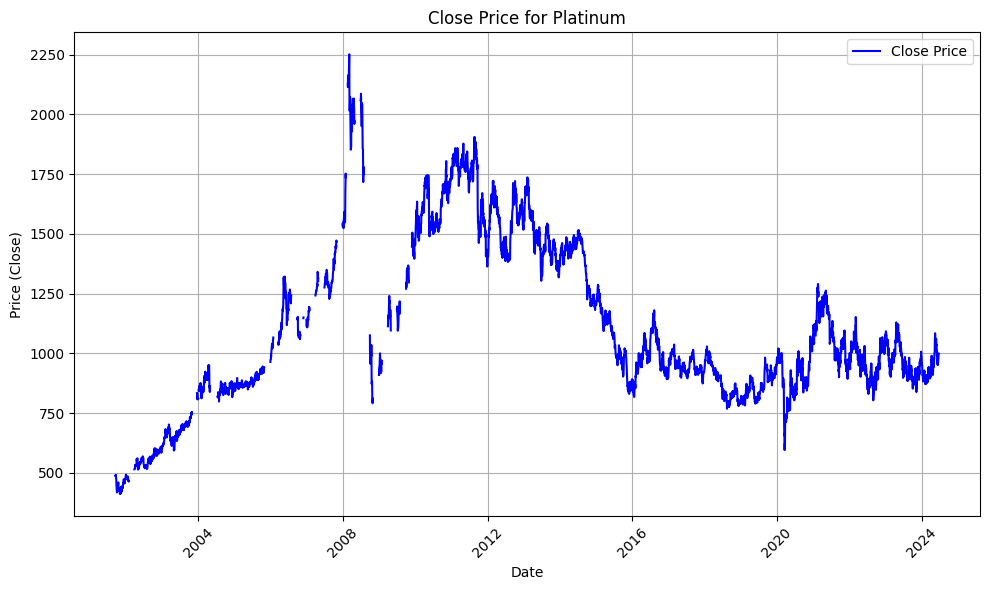

In [40]:
# Platinum
plt.figure(figsize=(10,6))
plt.plot(pivot_table_close_17092001.index, pivot_table_close_17092001['Platinum'], linestyle = '-', color='b', label = 'Close Price')
plt.title('Close Price for Platinum')
plt.xlabel('Date')
plt.ylabel('Price (Close)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
df_2006_10 = pivot_table_close_17092001.loc['2006-01-01':'2010-12-31']
df_2006_10.head()

commodity,Cocoa,Coffee,Copper,Corn,Cotton,Crude Oil,Gold,Heating Oil,KC HRW Wheat,Lean Hogs,...,Orange Juice,Palladium,Platinum,RBOB Gasoline,Random Length Lumber,Rough Rice,Silver,Soybean,Soybean Oil,Sugar
date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,1546.0,108.599998,2.1680,220.00,55.240002,63.139999,530.700012,1.7964,390.50,64.650002,...,125.00,NaN,975.799988,1.7862,360.700012,805.0,9.087,617.5,22.959999,14.18
2006-01-04,1544.0,110.650002,2.2165,218.25,54.939999,63.419998,533.900024,1.8177,390.50,64.050003,...,126.25,NaN,995.599976,1.8245,373.899994,805.0,9.102,621.0,23.219999,14.87
2006-01-05,1519.0,117.449997,2.1385,215.50,54.689999,62.790001,526.299988,1.7881,385.50,64.625000,...,127.15,NaN,984.500000,1.8170,372.000000,804.0,8.809,608.0,22.950001,14.85
2006-01-06,1551.0,119.550003,2.1555,214.25,55.049999,64.209999,539.700012,1.8006,378.75,64.474998,...,128.45,NaN,996.799988,1.8455,367.399994,815.0,9.112,600.5,22.750000,14.88
2006-01-09,1505.0,120.150002,2.1670,211.00,55.700001,63.500000,549.099976,1.7677,370.50,64.675003,...,133.40,NaN,1012.299988,1.7975,362.000000,812.0,9.222,584.0,22.200001,14.60


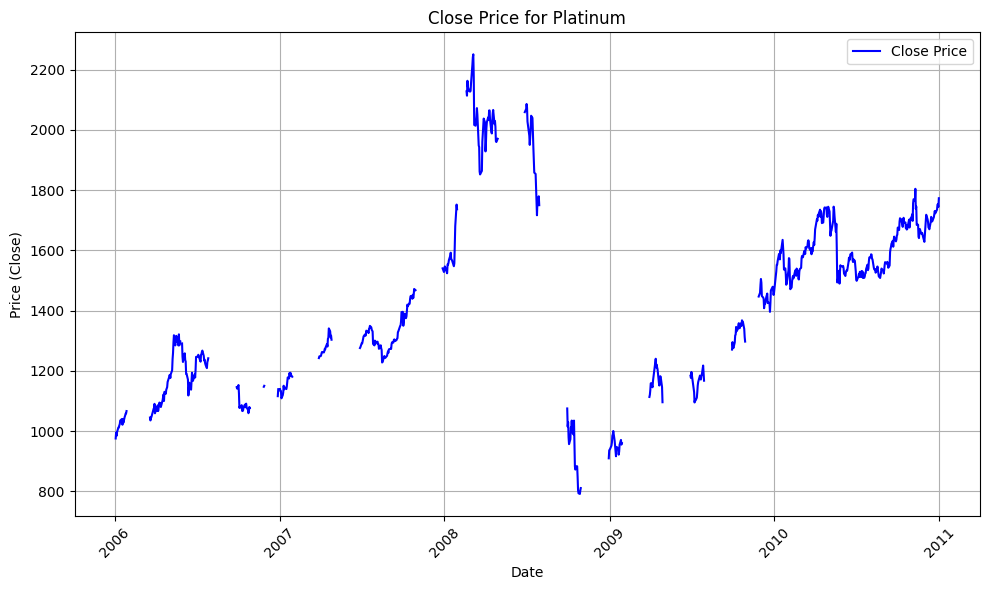

In [42]:
#Platinum 2006 - 2010
plt.figure(figsize=(10,6))
plt.plot(df_2006_10.index, df_2006_10['Platinum'], linestyle = '-', color='b', label = 'Close Price')
plt.title('Close Price for Platinum')
plt.xlabel('Date')
plt.ylabel('Price (Close)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

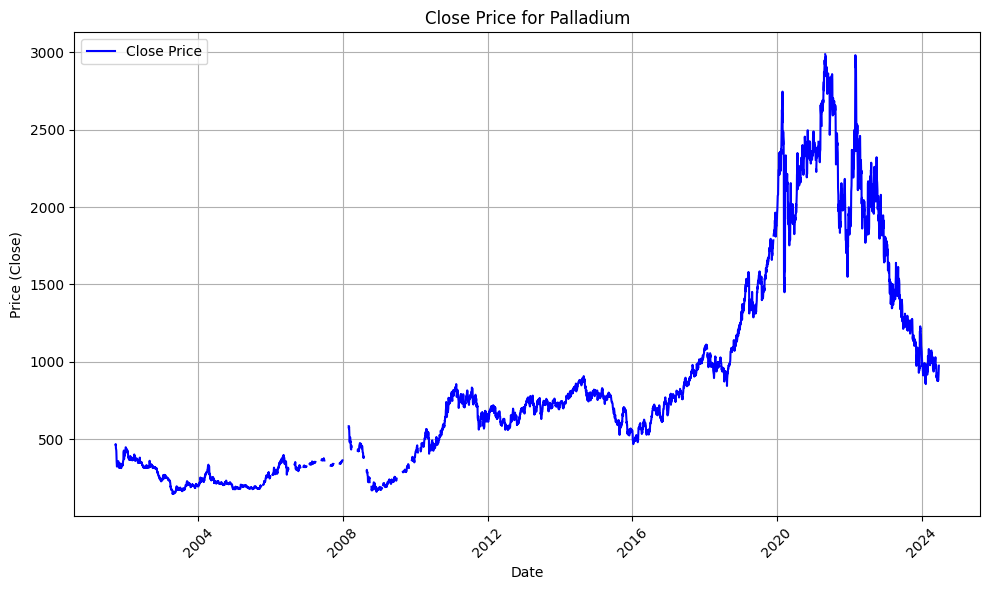

In [43]:
# Palladium
plt.figure(figsize=(10,6))
plt.plot(pivot_table_close_17092001.index, pivot_table_close_17092001['Palladium'], linestyle = '-', color='b', label = 'Close Price')
plt.title('Close Price for Palladium')
plt.xlabel('Date')
plt.ylabel('Price (Close)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

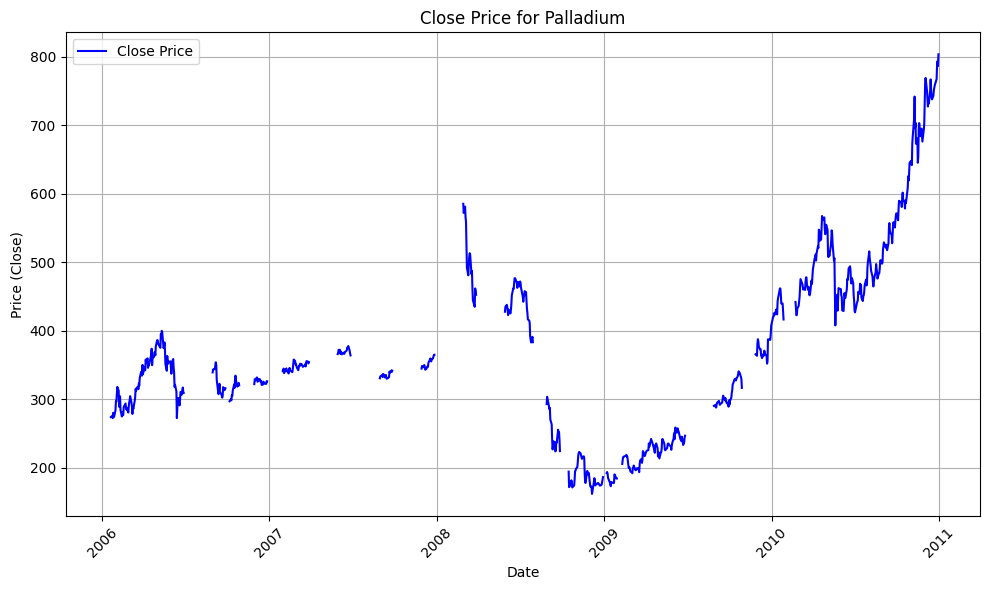

In [44]:
# Palladium 2006 - 2010
plt.figure(figsize=(10,6))
plt.plot(df_2006_10.index, df_2006_10['Palladium'], linestyle = '-', color='b', label = 'Close Price')
plt.title('Close Price for Palladium')
plt.xlabel('Date')
plt.ylabel('Price (Close)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Puisque les données correspondantes ne sont également pas disponibles dans la source, nous supprimerons les données pour le platine et le palladium. Elles présentent un pourcentage élevé de valeurs manquantes, principalement concentrées sur une période de deux ans. L'utilisation de données fictives aurait faussé les calculs de volatilité.

In [45]:
df = df[df['commodity'] != 'Platinum']
df.shape

(119610, 9)

In [46]:
df = df[df['commodity'] != 'Palladium']
df.shape

(114351, 9)

Vérifions que les valeurs pour les autres matières premières ne sont pas concentrées en un seul endroit

In [47]:
ptc_17092001_na = pivot_table_close_17092001.isnull().sum()
ptc_17092001_na

commodity
Cocoa                    31
Coffee                   33
Copper                   24
Corn                     18
Cotton                   31
Crude Oil                23
Gold                     27
Heating Oil              23
KC HRW Wheat             14
Lean Hogs                25
Live Cattle              39
Natural Gas              22
Oat                      29
Orange Juice             31
Palladium               484
Platinum                725
RBOB Gasoline            21
Random Length Lumber    315
Rough Rice               38
Silver                   27
Soybean                  12
Soybean Oil              26
Sugar                    31
dtype: int64

In [48]:
column_list = list(pivot_table_close_17092001.columns)
column_list

['Cocoa',
 'Coffee',
 'Copper',
 'Corn',
 'Cotton',
 'Crude Oil',
 'Gold',
 'Heating Oil',
 'KC HRW Wheat',
 'Lean Hogs',
 'Live Cattle',
 'Natural Gas',
 'Oat',
 'Orange Juice',
 'Palladium',
 'Platinum',
 'RBOB Gasoline',
 'Random Length Lumber',
 'Rough Rice',
 'Silver',
 'Soybean',
 'Soybean Oil',
 'Sugar']

In [49]:
values_to_remove = ['Random Length Lumber', 'Palladium', 'Platinum']

products = list(filter(lambda x: x not in values_to_remove, column_list))
products

['Cocoa',
 'Coffee',
 'Copper',
 'Corn',
 'Cotton',
 'Crude Oil',
 'Gold',
 'Heating Oil',
 'KC HRW Wheat',
 'Lean Hogs',
 'Live Cattle',
 'Natural Gas',
 'Oat',
 'Orange Juice',
 'RBOB Gasoline',
 'Rough Rice',
 'Silver',
 'Soybean',
 'Soybean Oil',
 'Sugar']

In [50]:
for product in products:
    
    missing_dates = pivot_table_close_17092001[pivot_table_close_17092001[product].isna()].index
    print(f"Valeurs manquantes pour {product}:")
    print(missing_dates)
    print()

Valeurs manquantes pour Cocoa:
DatetimeIndex(['2001-11-23', '2001-12-24', '2001-12-26', '2001-12-31',
               '2002-02-18', '2002-07-04', '2002-07-05', '2002-11-29',
               '2002-12-26', '2003-01-20', '2003-02-18', '2003-11-28',
               '2003-12-26', '2004-01-02', '2004-06-11', '2004-11-25',
               '2004-11-26', '2004-12-31', '2005-01-17', '2005-11-24',
               '2005-11-25', '2006-05-29', '2006-09-04', '2006-11-23',
               '2006-11-24', '2006-12-25', '2007-01-01', '2007-01-02',
               '2007-11-23', '2007-12-24', '2011-01-03'],
              dtype='datetime64[ns]', name='date', freq=None)

Valeurs manquantes pour Coffee:
DatetimeIndex(['2001-11-12', '2001-11-23', '2001-12-24', '2001-12-26',
               '2001-12-31', '2002-02-18', '2002-07-04', '2002-07-05',
               '2002-11-29', '2002-12-26', '2003-01-20', '2003-02-18',
               '2003-11-28', '2003-12-26', '2004-01-02', '2004-06-11',
               '2004-11-25', '2004-

# I. Création d'un dataframe avec la même plage de données pour chaque marchandise

### 1. Créons un dataframe contenant toutes les valeurs distinctes de date:

In [51]:
df_date = pd.DataFrame(df['date'].unique(), columns=['date'])
df_date.head(-1)

,date
0,2002-03-04
1,2002-03-05
2,2002-03-06
3,2002-03-07
4,2002-03-08
...,...
5735,2007-01-01
5736,2001-11-23
5737,2001-12-24
5738,2005-11-24


Trions le dataframe:

In [52]:
df_date_sorted = df_date.sort_values(by='date')
df_date_sorted = df_date_sorted.reset_index(drop = True)
df_date_sorted.head(-1)
#6172 rows × 1 columns

,date
0,2001-09-17
1,2001-09-18
2,2001-09-19
3,2001-09-20
4,2001-09-21
...,...
5735,2024-06-14
5736,2024-06-17
5737,2024-06-18
5738,2024-06-20


In [53]:
df_date_sorted.dtypes

date    datetime64[ns]
dtype: object

In [54]:
df_date_sorted['date'] = pd.to_datetime(df_date_sorted['date'])
df_date_sorted.head(-1)

,date
0,2001-09-17
1,2001-09-18
2,2001-09-19
3,2001-09-20
4,2001-09-21
...,...
5735,2024-06-14
5736,2024-06-17
5737,2024-06-18
5738,2024-06-20


In [55]:
year_counts = df_date_sorted['date'].dt.year.value_counts()
year_counts = year_counts.sort_index()
year_counts

date
2001     74
2002    254
2003    252
2004    254
2005    254
2006    254
2007    253
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    250
2017    251
2018    251
2019    252
2020    253
2021    252
2022    251
2023    251
2024    120
Name: count, dtype: int64

### 2. Création d'un dataframe avec des marchandises distinctes

In [56]:
df_commodity = pd.DataFrame(df[['commodity', 'ticker', 'category']].drop_duplicates(), columns = ['commodity', 'ticker', 'category'])
#df_commodity = df_commodity.reset_index()
df_commodity.head(-1)

,commodity,ticker,category
0,Lean Hogs,HE=F,Animal Products
5603,Live Cattle,LE=F,Animal Products
11617,Cocoa,CC=F,Agricultural Commodities
17753,Coffee,KC=F,Agricultural Commodities
23887,Cotton,CT=F,Agricultural Commodities
35322,Orange Juice,OJ=F,Agricultural Commodities
36411,Sugar,SB=F,Agricultural Commodities
42387,Crude Oil,CL=F,Fossil Fuels
48364,Heating Oil,HO=F,Fossil Fuels
54343,Natural Gas,NG=F,Fossil Fuels


### 3. Création d'un datarame avec tous les combinaisons de dates et des marchandises

In [57]:
df_cross = pd.merge(df_date_sorted, df_commodity, how = 'cross')
df_cross.head(-1)

,date,commodity,ticker,category
0,2001-09-17,Lean Hogs,HE=F,Animal Products
1,2001-09-17,Live Cattle,LE=F,Animal Products
2,2001-09-17,Cocoa,CC=F,Agricultural Commodities
3,2001-09-17,Coffee,KC=F,Agricultural Commodities
4,2001-09-17,Cotton,CT=F,Agricultural Commodities
...,...,...,...,...
114814,2024-06-24,Corn,ZC=F,Grains and Cereals
114815,2024-06-24,Oat,ZO=F,Grains and Cereals
114816,2024-06-24,KC HRW Wheat,KE=F,Grains and Cereals
114817,2024-06-24,Rough Rice,ZR=F,Grains and Cereals


In [58]:
df_cross = df_cross.sort_values(by = ['commodity','date'])
df_cross.head(-1)

,date,commodity,ticker,category
2,2001-09-17,Cocoa,CC=F,Agricultural Commodities
22,2001-09-18,Cocoa,CC=F,Agricultural Commodities
42,2001-09-19,Cocoa,CC=F,Agricultural Commodities
62,2001-09-20,Cocoa,CC=F,Agricultural Commodities
82,2001-09-21,Cocoa,CC=F,Agricultural Commodities
...,...,...,...,...
114706,2024-06-14,Sugar,SB=F,Agricultural Commodities
114726,2024-06-17,Sugar,SB=F,Agricultural Commodities
114746,2024-06-18,Sugar,SB=F,Agricultural Commodities
114766,2024-06-20,Sugar,SB=F,Agricultural Commodities


### 4. Fusion du dataframe créé avec un dataframe initial (pour voir les vraies valeurs manquantes)

In [59]:
df_complet = pd.merge(df_cross, df, on = ['commodity', 'date', 'ticker', 'category'], how = 'outer')
df_complet.head(-1)
# 148151 rows × 9 columns

,date,commodity,ticker,category,open,high,low,close,volume
0,2001-09-17,Cocoa,CC=F,Agricultural Commodities,929.00,929.000000,927.000000,927.000000,0.0
1,2001-09-18,Cocoa,CC=F,Agricultural Commodities,930.00,930.000000,920.000000,925.000000,2629.0
2,2001-09-19,Cocoa,CC=F,Agricultural Commodities,942.00,966.000000,942.000000,964.000000,7043.0
3,2001-09-20,Cocoa,CC=F,Agricultural Commodities,985.00,1004.000000,985.000000,998.000000,3392.0
4,2001-09-21,Cocoa,CC=F,Agricultural Commodities,1002.00,1006.000000,975.000000,992.000000,2728.0
...,...,...,...,...,...,...,...,...,...
114830,2024-06-14,Sugar,SB=F,Agricultural Commodities,19.49,19.600000,19.270000,19.430000,61211.0
114831,2024-06-17,Sugar,SB=F,Agricultural Commodities,19.32,19.320000,18.809999,18.980000,87484.0
114832,2024-06-18,Sugar,SB=F,Agricultural Commodities,18.93,19.190001,18.809999,18.920000,52594.0
114833,2024-06-20,Sugar,SB=F,Agricultural Commodities,19.10,19.430000,18.820000,18.889999,70520.0


In [60]:
df_complet.dtypes

date         datetime64[ns]
commodity            object
ticker               object
category             object
open                float64
high                float64
low                 float64
close               float64
volume              float64
dtype: object

In [61]:
# nombre de valeurs manquantes
null_values_dfc = df_complet.isnull().sum()
null_values_dfc

date           0
commodity      0
ticker         0
category       0
open         485
high         485
low          485
close        485
volume       485
dtype: int64

# II. Gestion des valeurs manquantes

In [62]:
pivot_table_all = df.pivot_table(
    index='date',  
    columns='commodity',  
    values=['open'],  
    observed=False
)

In [63]:
pivot_table_all.head()

open                                                   \
commodity    Cocoa     Coffee  Copper    Corn     Cotton  Crude Oil   
date                                                                  
2001-09-17   929.0  48.500000  0.6510     NaN  36.500000  27.000000   
2001-09-18   930.0  48.799999  0.6560  217.25  35.450001  28.000000   
2001-09-19   942.0  48.000000  0.6495  214.25  34.799999  27.320000   
2001-09-20   985.0  47.400002  0.6530  211.25  33.799999  26.700001   
2001-09-21  1002.0  48.000000  0.6475  214.00  34.250000  26.450001   

                                                                       \
commodity         Gold Heating Oil KC HRW Wheat Lean Hogs Live Cattle   
date                                                                    
2001-09-17  289.799988      0.8125       286.00     57.75       76.60   
2001-09-18  288.100006      0.7950       285.50     57.75       76.70   
2001-09-19  291.500000      0.7400       281.00     57.70       76.32   
2001-09-20  289.500000      0.7270       291.25     56.30       74.95   
2001-09-21  291.899994      0.7250       293.25     55.80       74.25   

                                                                            \
commodity  Natural Gas    Oat Orange Juice RBOB Gasoline Rough Rice Silver   
date                                                                         
2001-09-17       2.552  134.0        79.70        0.8400      382.0  4.290   
2001-09-18       2.250  134.0        79.40        0.8220      376.0  4.443   
2001-09-19       2.170  134.0        80.50        0.7860      372.0  4.450   
2001-09-20       2.110  134.0        80.25        0.7625      383.5  4.655   
2001-09-21       2.110    NaN        82.30        0.7350      389.5  4.640   

                                      
commodity  Soybean Soybean Oil Sugar  
date                                  
2001-09-17  473.00       16.10  8.00  
2001-09-18  478.75       16.10  7.83  
2001-09-19  475.00       16.25  7.60  
2001-09-20  469.25         NaN  7.35  
2001-09-21  473.50       16.25  7.13

In [64]:
pt_all_na = pivot_table_all.isnull().sum()
pt_all_na

      commodity    
open  Cocoa            29
      Coffee           31
      Copper           22
      Corn             16
      Cotton           29
      Crude Oil        21
      Gold             25
      Heating Oil      21
      KC HRW Wheat     12
      Lean Hogs        23
      Live Cattle      37
      Natural Gas      20
      Oat              27
      Orange Juice     29
      RBOB Gasoline    19
      Rough Rice       36
      Silver           25
      Soybean          10
      Soybean Oil      24
      Sugar            29
dtype: int64

In [65]:
df_corn = df_complet[df_complet['commodity'] == 'Corn']
df_corn.head()

,date,commodity,ticker,category,open,high,low,close,volume
17223,2001-09-17,Corn,ZC=F,Grains and Cereals,NaN,NaN,NaN,NaN,NaN
17224,2001-09-18,Corn,ZC=F,Grains and Cereals,217.25,217.25,217.25,217.25,5.0
17225,2001-09-19,Corn,ZC=F,Grains and Cereals,214.25,214.25,214.25,214.25,5.0
17226,2001-09-20,Corn,ZC=F,Grains and Cereals,211.25,211.25,211.25,211.25,5.0
17227,2001-09-21,Corn,ZC=F,Grains and Cereals,214.00,214.00,214.00,214.00,5.0


Si la valeur manquante se trouve au début de la plage de dates (2001-09-17), il ne faut pas utiliser la méthode ffill, car une valeur d’une autre marchandise pourrait être prise. C’est pourquoi, avant d’utiliser ffill, remplissons la valeur na pour Corn au 2001-09-17 par la valeur du 2001-09-18.

In [66]:
df_complet.loc[(df_complet['date'] == '2001-09-17') & (df_complet['commodity'] == 'Corn'), ['date', 'commodity', 'ticker', 'category', 'open', 'high', 'low', 'close', 'volume']] = ['2001-09-17', 'Corn', 'ZC=F', 'Grains and Cereals', 217.25, 217.25, 217.25, 217.25, 0]

In [67]:
df_corn = df_complet[df_complet['commodity'] == 'Corn']
df_corn.head()

,date,commodity,ticker,category,open,high,low,close,volume
17223,2001-09-17,Corn,ZC=F,Grains and Cereals,217.25,217.25,217.25,217.25,0.0
17224,2001-09-18,Corn,ZC=F,Grains and Cereals,217.25,217.25,217.25,217.25,5.0
17225,2001-09-19,Corn,ZC=F,Grains and Cereals,214.25,214.25,214.25,214.25,5.0
17226,2001-09-20,Corn,ZC=F,Grains and Cereals,211.25,211.25,211.25,211.25,5.0
17227,2001-09-21,Corn,ZC=F,Grains and Cereals,214.00,214.00,214.00,214.00,5.0


Pour las autres produits utilisons la methode ffill pour gérer les valeurs manquantes

In [68]:
df_complet = df_complet.ffill()

In [69]:
df_complet.isnull().sum()

date         0
commodity    0
ticker       0
category     0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

6. Statistiques descriptives

In [70]:
df_complet.describe()

,date,open,high,low,close,volume
count,114836,114836.000000,114836.000000,114836.000000,114836.000000,1.148360e+05
mean,2013-01-26 21:50:41.485248512,391.738427,395.468228,388.128157,391.738357,3.906820e+04
min,2001-09-17 00:00:00,-14.000000,0.507000,-40.320000,-37.630001,0.000000e+00
25%,2007-05-14 00:00:00,15.850000,15.974750,15.722250,15.850000,2.400000e+02
50%,2013-01-25 00:00:00,89.000000,89.767502,88.172501,89.005001,6.349000e+03
75%,2018-10-09 00:00:00,423.000000,426.349991,419.000000,422.750000,3.746725e+04
max,2024-06-24 00:00:00,11967.000000,12261.000000,11132.000000,11878.000000,2.288230e+06
std,NaN,679.552012,687.474275,672.089951,679.948059,8.915274e+04


In [71]:
negativ_open = df_complet[df_complet['open']<0]
negativ_open

,date,commodity,ticker,category,open,high,low,close,volume
33394,2020-04-21,Crude Oil,CL=F,Fossil Fuels,-14.0,13.86,-16.74,10.01,2288230.0


In [72]:
negativ_low = df_complet[df_complet['low']<0]
negativ_low

,date,commodity,ticker,category,open,high,low,close,volume
33393,2020-04-20,Crude Oil,CL=F,Fossil Fuels,17.73,17.85,-40.32,-37.630001,247947.0
33394,2020-04-21,Crude Oil,CL=F,Fossil Fuels,-14.00,13.86,-16.74,10.010000,2288230.0


In [73]:
negativ_close = df_complet[df_complet['close']<0]
negativ_close

,date,commodity,ticker,category,open,high,low,close,volume
33393,2020-04-20,Crude Oil,CL=F,Fossil Fuels,17.73,17.85,-40.32,-37.630001,247947.0


In [74]:
date_unique = df_complet['date'].nunique()
date_unique

5741

In [75]:
commodity_unique = df_complet['commodity'].nunique()
commodity_unique

20

Création d’au moins deux nouvelles variables en fonction des autres variables

In [76]:
df_complet['year_period'] = df_complet['date'].dt.to_period('Y')  # Création de la colonne Year_period avec le type period
df_complet['quarter_period'] = df_complet['date'].dt.to_period('Q')  # Création de la colonne Quarter_period avec le type period

In [77]:
df_complet.dtypes

date              datetime64[ns]
commodity                 object
ticker                    object
category                  object
open                     float64
high                     float64
low                      float64
close                    float64
volume                   float64
year_period        period[Y-DEC]
quarter_period     period[Q-DEC]
dtype: object

In [78]:
df_complet.head()

,date,commodity,ticker,category,open,high,low,close,volume,year_period,quarter_period
0,2001-09-17,Cocoa,CC=F,Agricultural Commodities,929.0,929.0,927.0,927.0,0.0,2001,2001Q3
1,2001-09-18,Cocoa,CC=F,Agricultural Commodities,930.0,930.0,920.0,925.0,2629.0,2001,2001Q3
2,2001-09-19,Cocoa,CC=F,Agricultural Commodities,942.0,966.0,942.0,964.0,7043.0,2001,2001Q3
3,2001-09-20,Cocoa,CC=F,Agricultural Commodities,985.0,1004.0,985.0,998.0,3392.0,2001,2001Q3
4,2001-09-21,Cocoa,CC=F,Agricultural Commodities,1002.0,1006.0,975.0,992.0,2728.0,2001,2001Q3


In [79]:
df_distinct_category = df_complet['category'].unique()
df_distinct_category

array(['Agricultural Commodities', 'Precious Metals',
       'Grains and Cereals', 'Fossil Fuels', 'Animal Products'],
      dtype=object)

In [80]:
df_distinct_commodity = df_complet['commodity'].unique()
df_distinct_commodity

array(['Cocoa', 'Coffee', 'Copper', 'Corn', 'Cotton', 'Crude Oil', 'Gold',
       'Heating Oil', 'KC HRW Wheat', 'Lean Hogs', 'Live Cattle',
       'Natural Gas', 'Oat', 'Orange Juice', 'RBOB Gasoline',
       'Rough Rice', 'Silver', 'Soybean', 'Soybean Oil', 'Sugar'],
      dtype=object)

In [81]:
df_complet.to_csv('df_complet.csv', index = False)

In [82]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114836 entries, 0 to 114835
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            114836 non-null  datetime64[ns]
 1   commodity       114836 non-null  object        
 2   ticker          114836 non-null  object        
 3   category        114836 non-null  object        
 4   open            114836 non-null  float64       
 5   high            114836 non-null  float64       
 6   low             114836 non-null  float64       
 7   close           114836 non-null  float64       
 8   volume          114836 non-null  float64       
 9   year_period     114836 non-null  period[Y-DEC] 
 10  quarter_period  114836 non-null  period[Q-DEC] 
dtypes: datetime64[ns](1), float64(5), object(3), period[Q-DEC](1), period[Y-DEC](1)
memory usage: 9.6+ MB
